(800, 1000)
(800, 1000)
Time to soluton : 0.3023360090001006


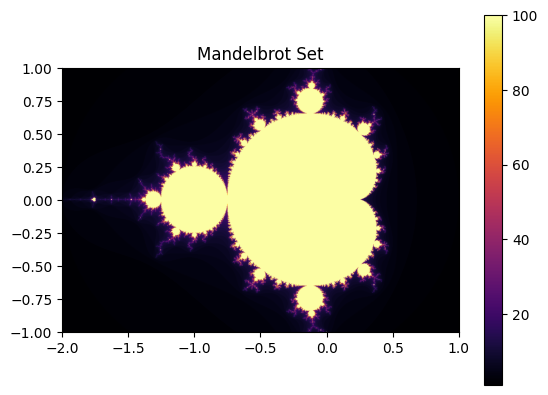

In [55]:
# CuPy implementation

import numpy as np
import matplotlib.pyplot as plt
import timeit
import cupy as cp

def mandelbrot_set(width, height, x_min, x_max, y_min, y_max, max_iter=100):
    """Generates the Mandelbrot set image."""
    x_vals = cp.linspace(x_min, x_max, width)
    y_vals = cp.linspace(y_min, y_max, height)
    x_2d = cp.tile(x_vals, (height,1))
    y_2d = cp.tile(y_vals.reshape(-1,1), (1,width))
    print(x_2d.shape)
    print(y_2d.shape)

    image = cp.zeros((height, width))
    mask = cp.full((height,width), True, dtype = bool)

    x_2d0 = x_2d.copy()
    y_2d0 = y_2d.copy()

    for i in range(max_iter):
      if not mask.any():
        break
      tmp = x_2d.copy()
      x_2d[mask] = cp.multiply(x_2d[mask],x_2d[mask]) - cp.multiply(y_2d[mask],y_2d[mask]) + x_2d0[mask]
      y_2d[mask] = 2*cp.multiply(tmp[mask],y_2d[mask]) + y_2d0[mask]
      image[mask] +=1
      mask = ( ( cp.multiply(x_2d,x_2d) + cp.multiply(y_2d,y_2d) )< 4 )
    image = cp.asnumpy(image)
    return image

# Parameters
width, height = 1000, 800
x_min, x_max, y_min, y_max = -2, 1, -1, 1

# Generate fractal
t1 = timeit.default_timer()
image = mandelbrot_set(width, height, x_min, x_max, y_min, y_max)
t2 = timeit.default_timer()

print("Time to soluton :", t2-t1)

# Display
plt.imshow(image, cmap='inferno', extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()


Time to soluton : 0.2717397529995651


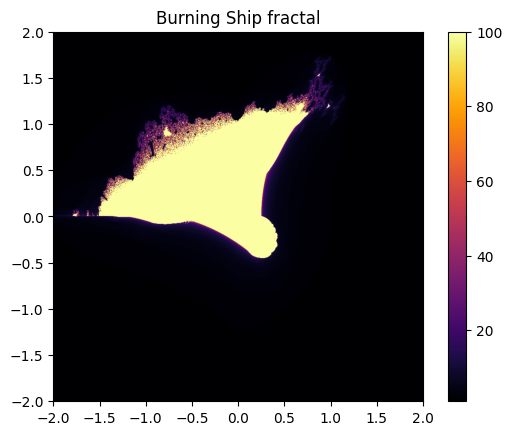

In [56]:
# PyTorch implementation --> buring ship fractal

import numpy as np
import matplotlib.pyplot as plt
import torch
import timeit


def fractal(width, height, x_min, x_max, y_min, y_max, max_iter=100):
    """Generates the Burning Ship image."""
    x_vals = np.linspace(x_min, x_max, width)
    y_vals = np.linspace(y_min, y_max, height)
    x_2d = np.tile(x_vals, (height,1))
    y_2d = np.tile(y_vals.reshape(-1,1), (1,width))

    x_2d = torch.from_numpy(x_2d)
    y_2d = torch.from_numpy(y_2d)
    x_2d = x_2d.cuda()
    y_2d = y_2d.cuda()

    image = torch.zeros((height, width)).cuda()
    mask = torch.full((height,width), True, dtype = bool)

    x_2d0 = torch.clone(x_2d)
    y_2d0 = torch.clone(y_2d)

    for i in range(max_iter):
      if not mask.any():
        break
      tmp = torch.clone(x_2d)
      x_2d[mask] = torch.multiply(x_2d[mask],x_2d[mask]) - torch.multiply(y_2d[mask],y_2d[mask]) + x_2d0[mask]
      y_2d[mask] = 2*abs(torch.multiply(tmp[mask],y_2d[mask]))+ y_2d0[mask]
      image[mask] +=1
      mask = ( ( torch.multiply(x_2d,x_2d) + torch.multiply(y_2d,y_2d) )< 4 )
    image = image.cpu()
    image = torch.Tensor.numpy(image)
    return image

# Parameters
width, height = 1000, 800
x_min, x_max, y_min, y_max = -2, 2, -2, 2

# Generate fractal
t1 = timeit.default_timer()
image = fractal(width, height, x_min, x_max, y_min, y_max)
t2 = timeit.default_timer()

print("Time to soluton :", t2-t1)

# Display
plt.imshow(image, cmap='inferno', extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
plt.title("Burning Ship fractal")
plt.show()
